# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>

![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |


<div class="alert alert-block alert-warning">
    
# <span style=" color:red">Store Sharing Project!

Welcome to "Bike Demand Visualization Project" which is the capstone project of Data Visualization Lessons . As you know recently, free or affordable access to bicycles has been provided for short-distance trips in an urban area as an alternative to motorized public transport or private vehicles. Thus, it is aimed to reduce traffic congestion, noise and air pollution.

The aim of this project is to reveal the current patterns in the data by showing the historical data of London bike shares with visualization tools.

This will allow us to X-ray the data as part of the EDA process before setting up a machine learning model. </span>




<div class="alert alert-block alert-info alert">

## <span style=" color:red">Determines

Features

- timestamp - timestamp field for grouping the data
- cnt - the count of a new bike shares
- t1 - real temperature in C
- t2 - temperature in C “feels like”
- hum - humidity in percentage
- wind_speed - wind speed in km/h
- weather_code - category of the weather
- is_holiday - boolean field - 1 holiday / 0 non holiday
- is_weekend - boolean field - 1 if the day is weekend
- season - category field meteorological seasons: 0-spring ; 1-summer; 2-fall; 3-winter.

"weather_code" category description:

- 1 = Clear ; mostly clear but have some values with haze/fog/patches of fog/ fog in vicinity
- 2 = scattered clouds / few clouds
- 3 = Broken clouds
- 4 = Cloudy
- 7 = Rain/ light Rain shower/ Light rain
- 10 = rain with thunderstorm
- 26 = snowfall
- 94 = Freezing Fog

Initially, the task of discovering data will be waiting for you as always. Recognize features, detect missing values, outliers etc. Review the data from various angles in different time breakdowns. For example, visualize the distribution of bike shares by day of the week. With this graph, you will be able to easily observe and make inferences how people's behavior changes daily. Likewise, you can make hourly, monthly, seasonally etc. analyzes. In addition, you can analyze correlation of variables with a heatmap.


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Import Libraries, Loading the Dataset and Initial Exploration

- Load the dataset, display first few rows, check the structure of the dataset.

- Inspect the data types and missing values using df.info()

- Get basic statistics for numerical columns with df.describe()
  


In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings;
warnings.filterwarnings("ignore")

In [17]:
df0 = pd.read_csv("store_sharing.csv")
df = df0.copy()

In [22]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [24]:
df.shape 

(17414, 10)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17414 entries, 0 to 17413
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   timestamp     17414 non-null  object 
 1   cnt           17414 non-null  int64  
 2   t1            17414 non-null  float64
 3   t2            17414 non-null  float64
 4   hum           17414 non-null  float64
 5   wind_speed    17414 non-null  float64
 6   weather_code  17414 non-null  float64
 7   is_holiday    17414 non-null  float64
 8   is_weekend    17414 non-null  float64
 9   season        17414 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 1.3+ MB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cnt,17414.0,1143.101642,1085.108068,0.0,257.0,844.0,1671.75,7860.0
t1,17414.0,12.468091,5.571818,-1.5,8.0,12.5,16.00,34.0
t2,17414.0,11.520836,6.615145,-6.0,6.0,12.5,16.00,34.0
hum,17414.0,72.324954,14.313186,20.5,63.0,74.5,83.00,100.0
wind_speed,17414.0,15.913063,7.894570,0.0,10.0,15.0,20.50,56.5
weather_code,17414.0,2.722752,2.341163,1.0,1.0,2.0,3.00,26.0
is_holiday,17414.0,0.022051,0.146854,0.0,0.0,0.0,0.00,1.0
is_weekend,17414.0,0.285403,0.451619,0.0,0.0,0.0,1.00,1.0
season,17414.0,1.492075,1.118911,0.0,0.0,1.0,2.00,3.0


<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Data Cleaning:

- Handle missing values.

- Check for duplicates and remove them if found.

- Standardize column names (if necessary) for consistent naming conventions.

- Validate data types and convert columns to appropriate types if needed.

- Look at the data type of each variable, transform timestamp in type, and set it as index.

- Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)



In [31]:
df.isnull().sum()


timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

In [33]:
df.duplicated().sum()

0

In [35]:
list(df.columns)

['timestamp',
 'cnt',
 't1',
 't2',
 'hum',
 'wind_speed',
 'weather_code',
 'is_holiday',
 'is_weekend',
 'season']

In [38]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [40]:
df.dtypes


timestamp        object
cnt               int64
t1              float64
t2              float64
hum             float64
wind_speed      float64
weather_code    float64
is_holiday      float64
is_weekend      float64
season          float64
dtype: object

In [42]:
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['weather_code'] = df['weather_code'].astype('category')
df['is_holiday'] = df['is_holiday'].astype('category')
df['is_weekend'] = df['is_weekend'].astype('category')
df['season'] = df['season'].astype('category')



In [44]:
df.dtypes

timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code          category
is_holiday            category
is_weekend            category
season                category
dtype: object

In [46]:
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


<div class="alert alert-block alert-success">

### <span style=" color:red"> Look at the data type of each variable, transform timestamp in type, and set it as index.


In [48]:
df.set_index('timestamp', inplace=True)

In [50]:
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
timestamp,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [52]:
df.dtypes

cnt                int64
t1               float64
t2               float64
hum              float64
wind_speed       float64
weather_code    category
is_holiday      category
is_weekend      category
season          category
dtype: object

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17414 entries, 2015-01-04 00:00:00 to 2017-01-03 23:00:00
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   cnt           17414 non-null  int64   
 1   t1            17414 non-null  float64 
 2   t2            17414 non-null  float64 
 3   hum           17414 non-null  float64 
 4   wind_speed    17414 non-null  float64 
 5   weather_code  17414 non-null  category
 6   is_holiday    17414 non-null  category
 7   is_weekend    17414 non-null  category
 8   season        17414 non-null  category
dtypes: category(4), float64(4), int64(1)
memory usage: 885.1 KB


<div class="alert alert-block alert-success">

### <span style=" color:red"> Make feature engineering. Extract new columns (day of the week, day of the month, hour, month, season, year etc.)


In [56]:

df['hour'] = df.index.hour
df['day_of_week'] = df.index.dayofweek  
df['day_name'] = df.index.day_name()  
df['day_of_month'] = df.index.day
df['month'] = df.index.month
df['month_name'] = df.index.month_name()  
df['year'] = df.index.year
df['week_of_year'] = df.index.isocalendar().week 
df['season'] = df['month'] % 12 // 3  

In [58]:
df.sample(5)

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,hour,day_of_week,day_name,day_of_month,month,month_name,year,week_of_year
timestamp,,,,,,,,,,,,,,,,,
2016-01-11 20:00:00,835,7.0,4.0,78.5,18.5,2.0,0.0,0.0,0,20,0,Monday,11,1,January,2016,2
2016-12-20 19:00:00,1295,6.0,3.5,81.0,12.0,3.0,0.0,0.0,0,19,1,Tuesday,20,12,December,2016,51
2016-03-14 13:00:00,1023,9.0,5.0,46.0,30.5,1.0,0.0,0.0,1,13,0,Monday,14,3,March,2016,11
2015-10-02 14:00:00,1702,18.0,18.0,52.0,16.0,1.0,0.0,0.0,3,14,4,Friday,2,10,October,2015,40
2016-06-11 09:00:00,1203,18.5,18.5,68.0,7.5,2.0,0.0,1.0,2,9,5,Saturday,11,6,June,2016,23


In [60]:
list(df.columns)

['cnt',
 't1',
 't2',
 'hum',
 'wind_speed',
 'weather_code',
 'is_holiday',
 'is_weekend',
 'season',
 'hour',
 'day_of_week',
 'day_name',
 'day_of_month',
 'month',
 'month_name',
 'year',
 'week_of_year']

<div class="alert alert-block alert-info alert">

## <span style=" color:red"> Analysis Goal 


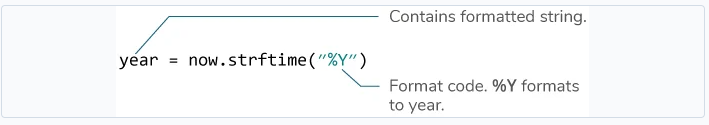


<div class="alert alert-block alert-success">

### <span style=" color:red"> Visualize the correlation with a heatmap

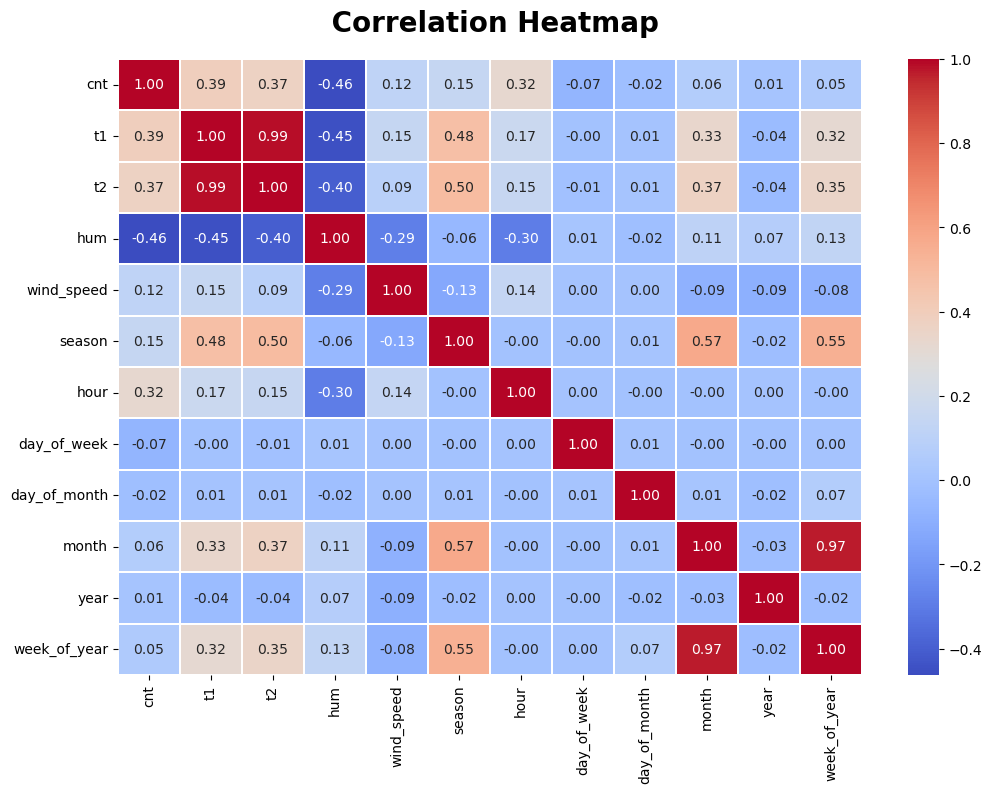

In [67]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.1)
plt.title(" Correlation Heatmap", fontsize=20,pad=20, weight='bold')
plt.show()

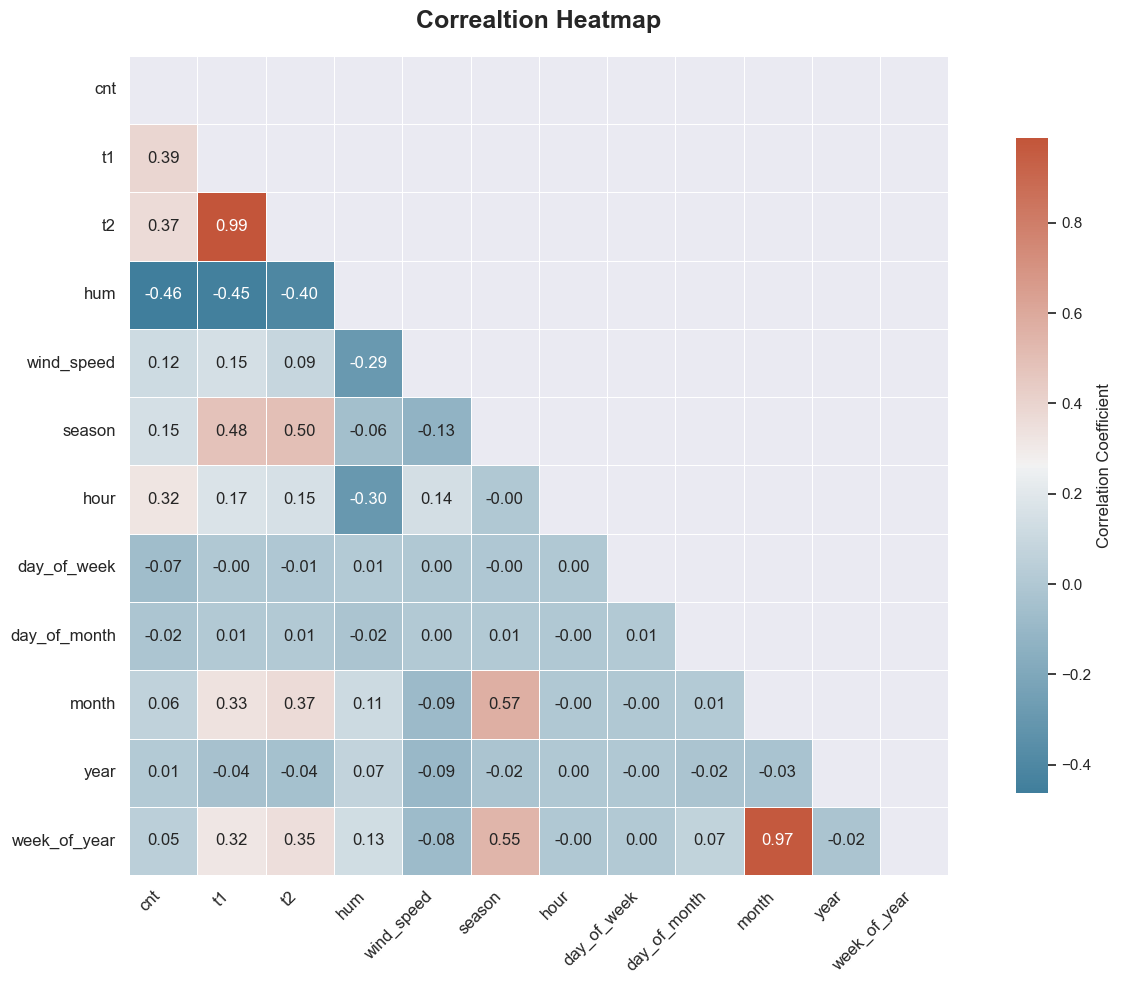

In [71]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(14, 10))
sns.set_theme(style="dark")

# Maskeleme → Üst üçgeni gizleyelim (gereksiz tekrarları önler)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Daha güzel renk paleti ve detaylar
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    square=True,
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)

plt.title("Correaltion Heatmap", fontsize=18, weight='bold', pad=20)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Visualize the correlation of the target variable and the other features with barplot.




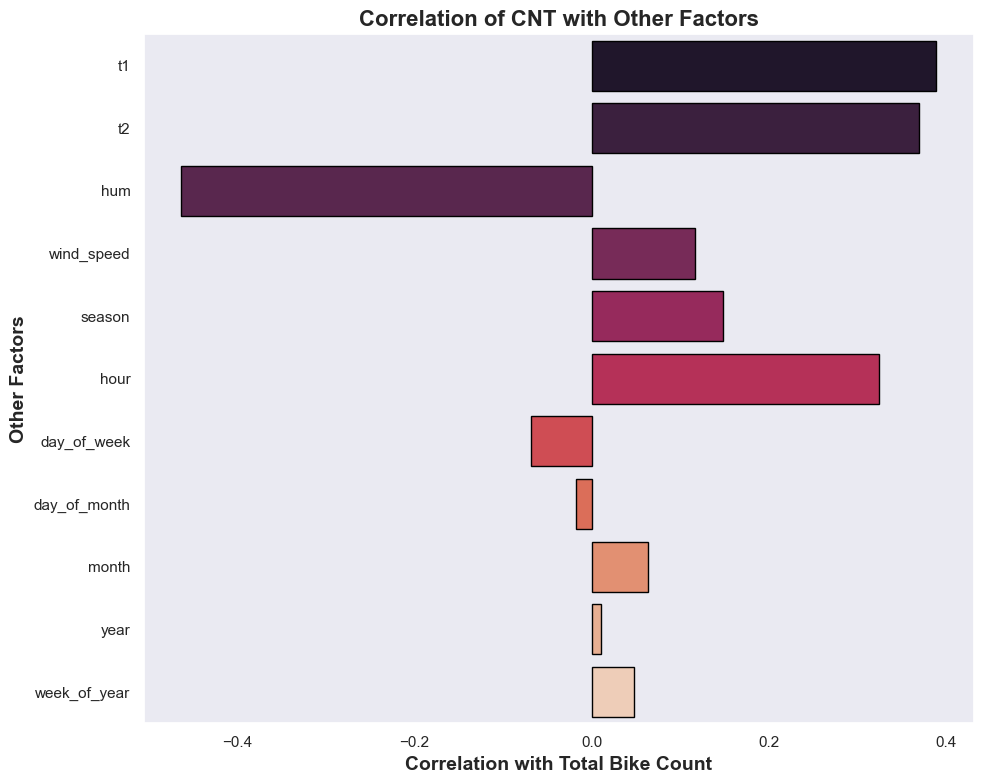

In [76]:

corr = df.corr(numeric_only=True)['cnt'].drop('cnt')

plt.figure(figsize=(10,8))
sns.barplot(x=corr.values, y=corr.index, palette='rocket', edgecolor='black')
plt.title('Correlation of CNT with Other Factors', weight='bold', fontsize=16)
plt.xlabel('Correlation with Total Bike Count', weight='bold', fontsize=14)
plt.ylabel('Other Factors', weight='bold', fontsize=14)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares over time use lineplot.



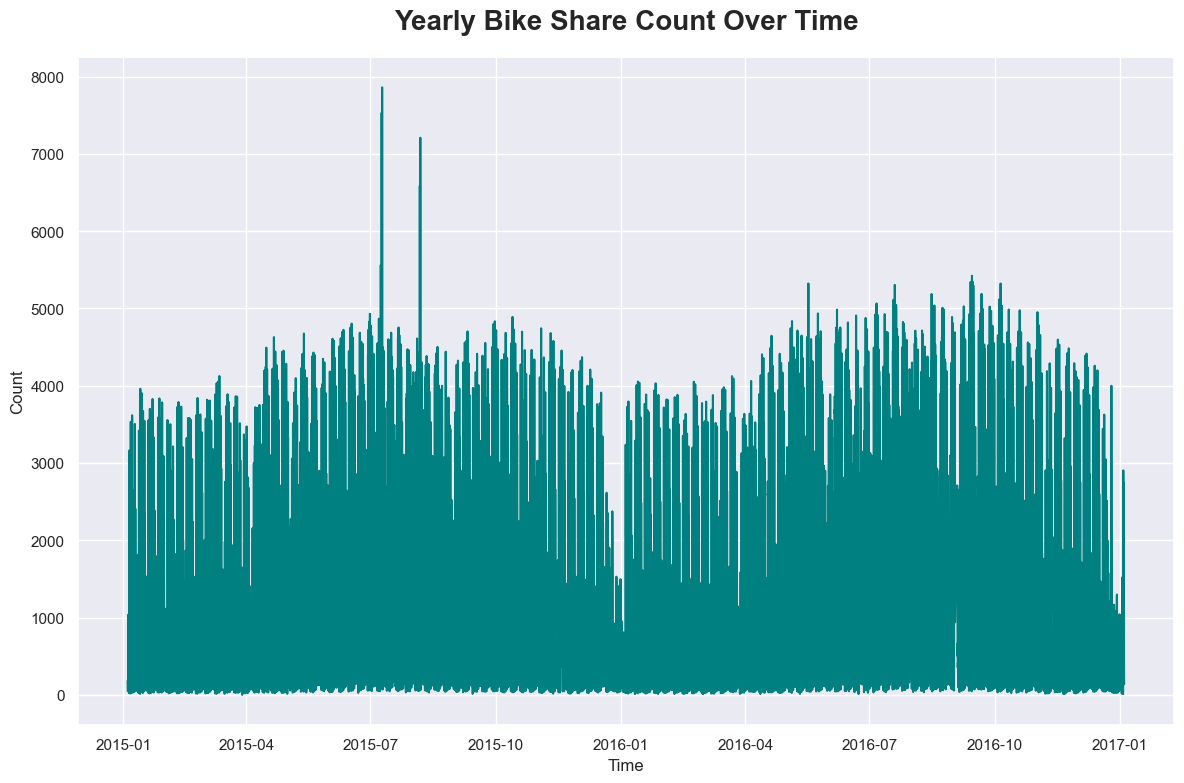

In [79]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=df, x=df.index, y='cnt', color='teal')
plt.title('Yearly Bike Share Count Over Time', weight='bold', fontsize=20, pad=20)
plt.xlabel('Time')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by months and year_of_month (use lineplot, pointplot, barplot).


In [82]:
monthly_avg = df.groupby('month')['cnt'].mean().reset_index()

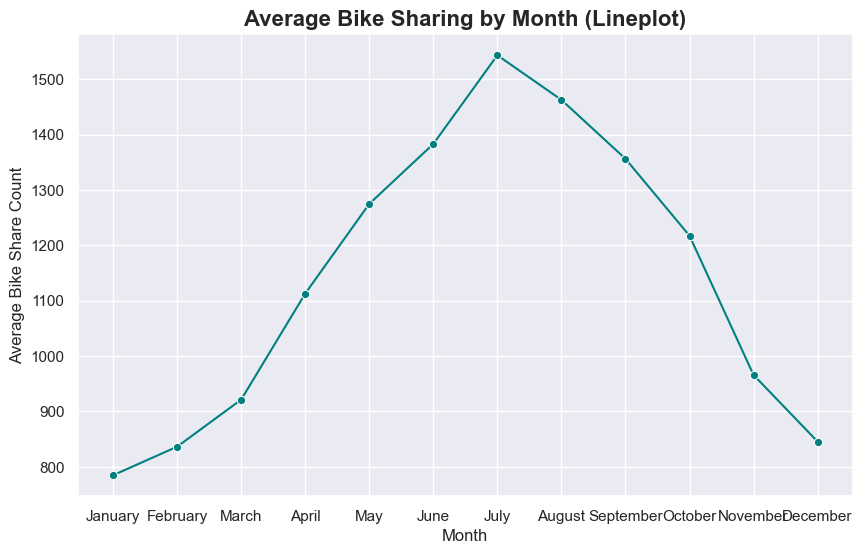

In [84]:
monthly_avg = df.groupby('month')['cnt'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=monthly_avg, x='month', y='cnt', marker='o', color='teal')
plt.title('Average Bike Sharing by Month (Lineplot)', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Average Bike Share Count')
plt.xticks(ticks=range(1,13), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(True)
plt.show()


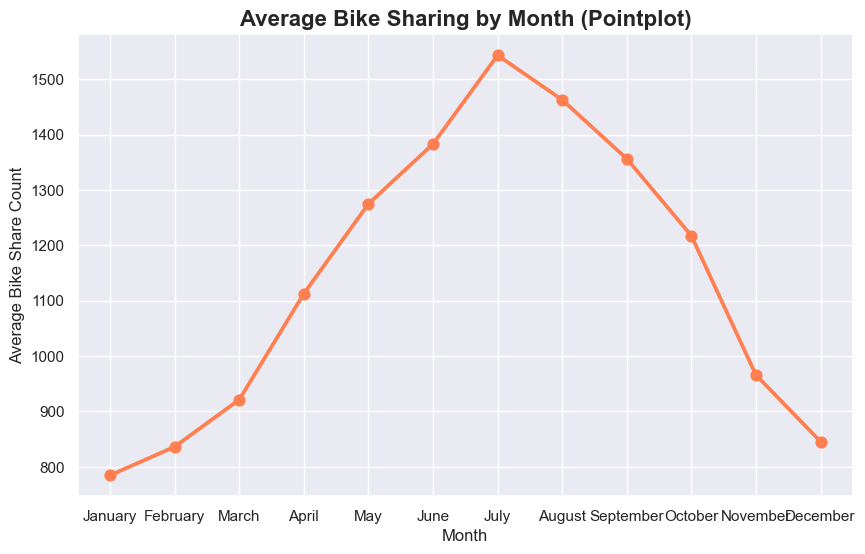

In [86]:
plt.figure(figsize=(10,6))
sns.pointplot(data=monthly_avg, x='month', y='cnt', color='coral')
plt.title('Average Bike Sharing by Month (Pointplot)', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Average Bike Share Count')
plt.xticks(ticks=range(12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(True)
plt.show()


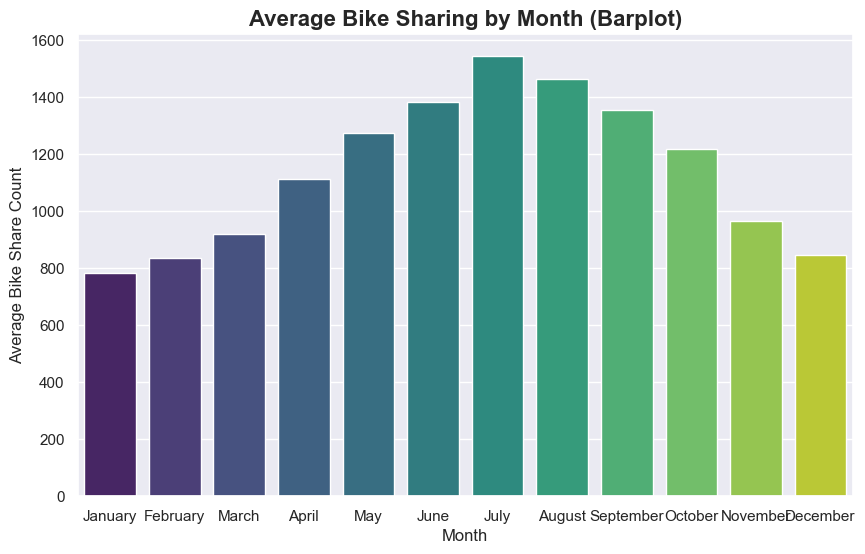

In [88]:
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_avg, x='month', y='cnt', palette='viridis')
plt.title('Average Bike Sharing by Month (Barplot)', fontsize=16, weight='bold')
plt.xlabel('Month')
plt.ylabel('Average Bike Share Count')
plt.xticks(ticks=range(12), labels=[
    'January', 'February', 'March', 'April', 'May', 'June',
    'July', 'August', 'September', 'October', 'November', 'December'])
plt.grid(axis='y')
plt.show()


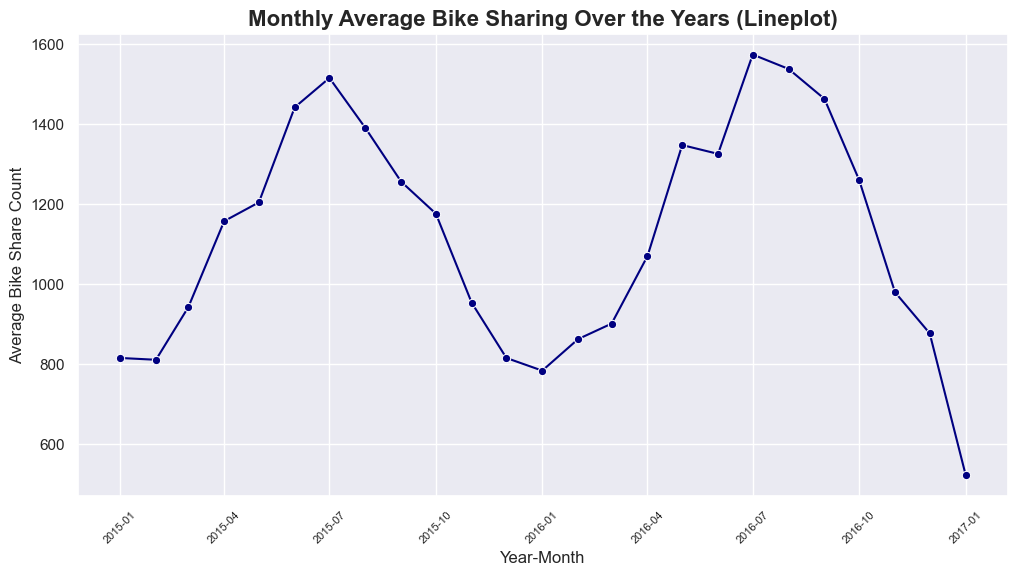

In [95]:

df['year_month'] = pd.to_datetime(df[['year', 'month']].assign(day=1))


year_month_avg = df.groupby('year_month')['cnt'].mean().reset_index()

plt.figure(figsize=(12,6))
sns.lineplot(data=year_month_avg, x='year_month', y='cnt', marker='o', color='navy')
plt.title('Monthly Average Bike Sharing Over the Years (Lineplot)', fontsize=16, weight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Average Bike Share Count')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.show()


- Grafik zamana bağlı bisiklet kullanımındaki artış ya da azalış trendini gösterecektir.

- Belirli dönemlerde (mesela yaz ayları) ortalamaların yükselip düştüğünü gözlemliyoruz ve böylece mevsimsel etkiyi rahatça anlayabiliriz.


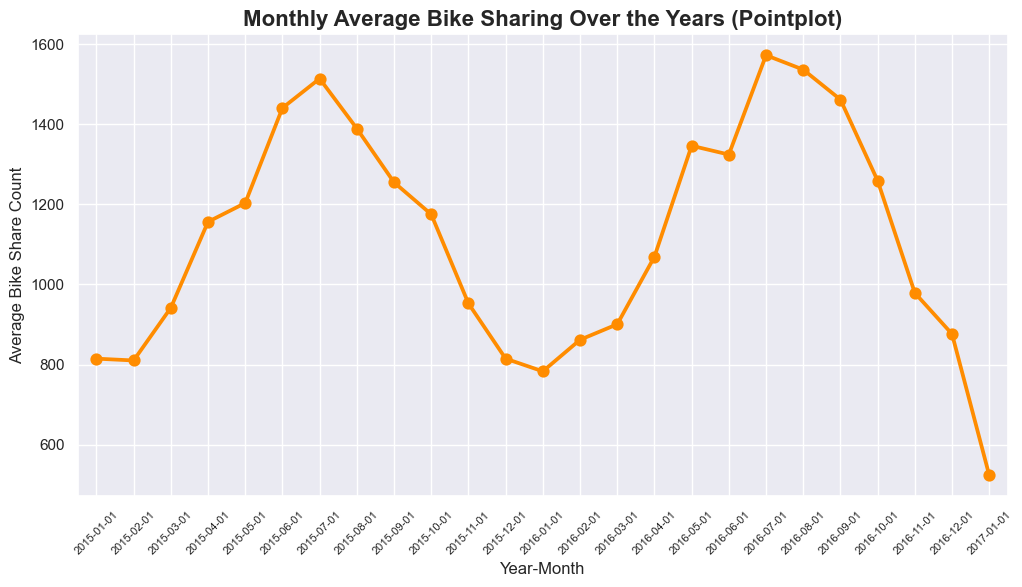

In [97]:
plt.figure(figsize=(12,6))
sns.pointplot(data=year_month_avg, x='year_month', y='cnt', color='darkorange')
plt.title('Monthly Average Bike Sharing Over the Years (Pointplot)', fontsize=16, weight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Average Bike Share Count')
plt.xticks(rotation=45, fontsize=8)
plt.grid(True)
plt.show()


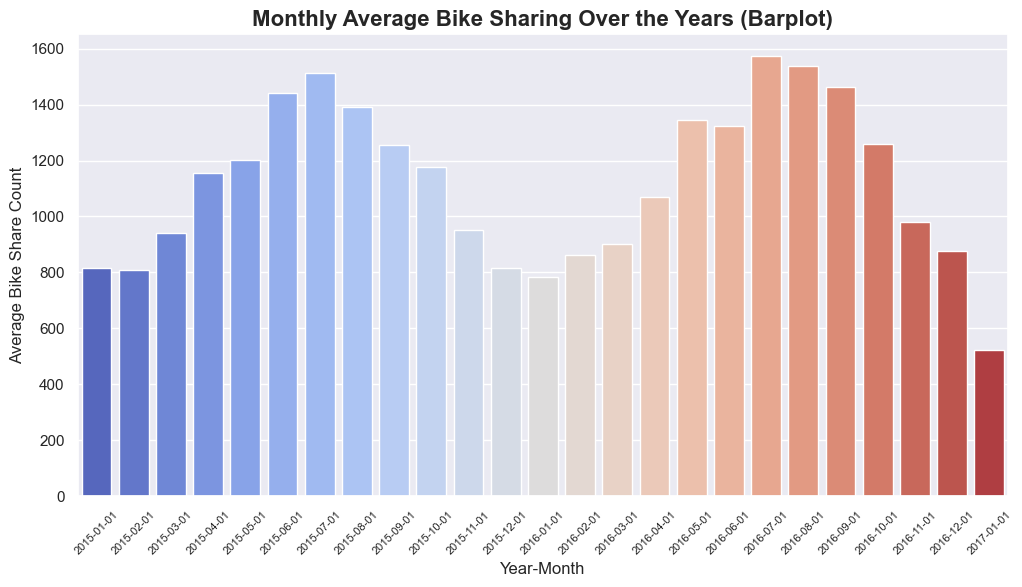

In [99]:
plt.figure(figsize=(12,6))
sns.barplot(data=year_month_avg, x='year_month', y='cnt', palette='coolwarm')
plt.title('Monthly Average Bike Sharing Over the Years (Barplot)', fontsize=16, weight='bold')
plt.xlabel('Year-Month')
plt.ylabel('Average Bike Share Count')
plt.xticks(rotation=45, fontsize=8)
plt.grid(axis='y')
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by hours on (holidays, weekend, season).


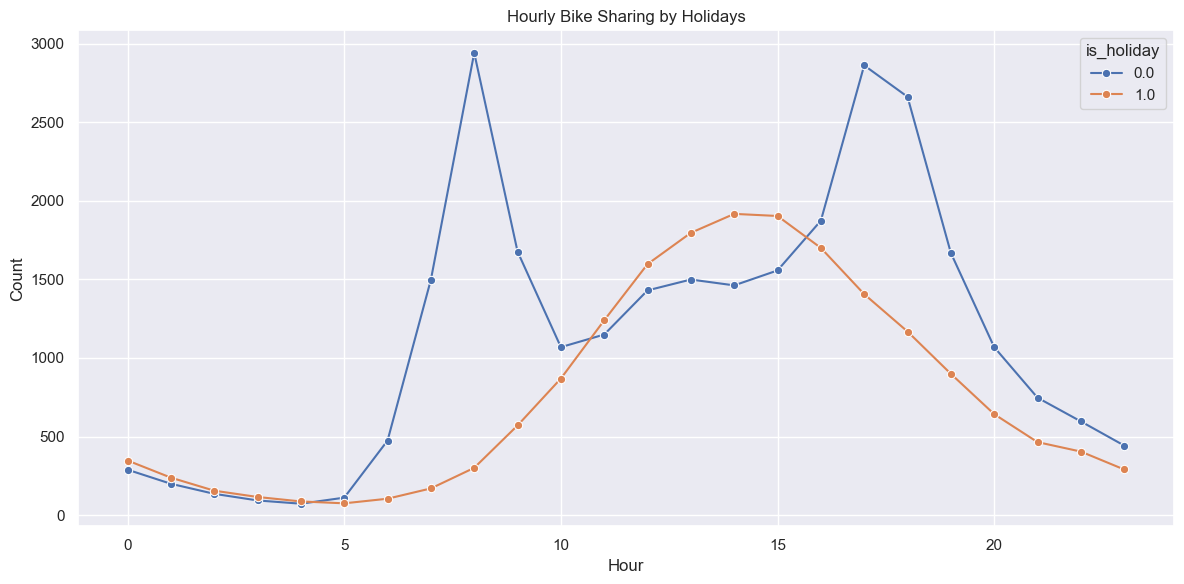

In [102]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='cnt', hue='is_holiday', marker='o', ci=None)
plt.title('Hourly Bike Sharing by Holidays')
plt.xlabel('Hour')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()


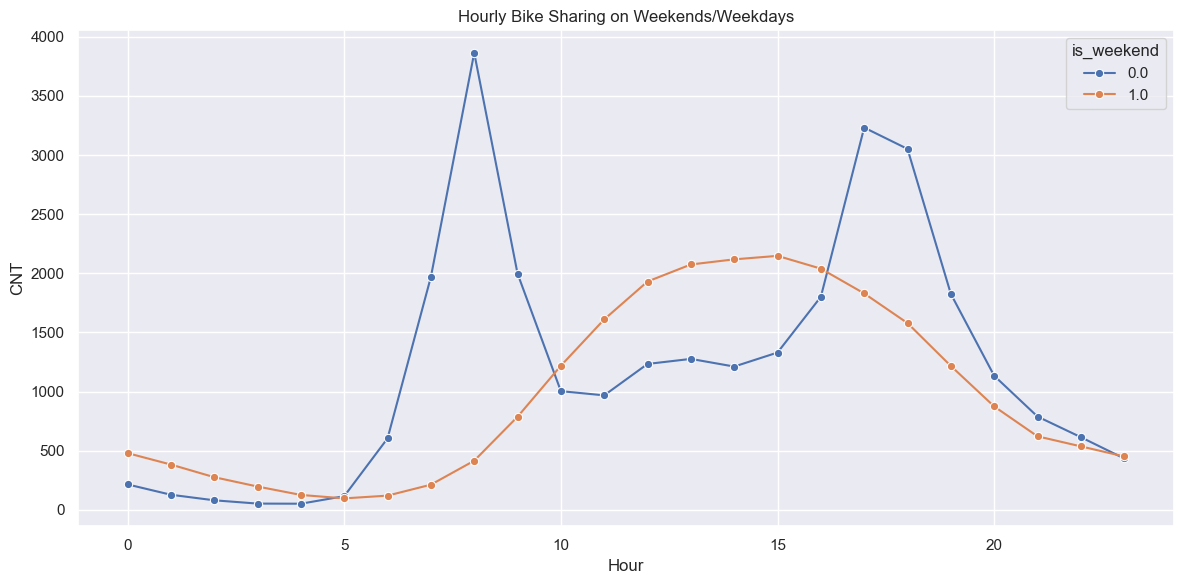

In [104]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', y='cnt', hue='is_weekend', marker='o', ci=None)
plt.title('Hourly Bike Sharing on Weekends/Weekdays')
plt.xlabel('Hour')
plt.ylabel('CNT')
plt.grid(True)
plt.tight_layout()
plt.show()


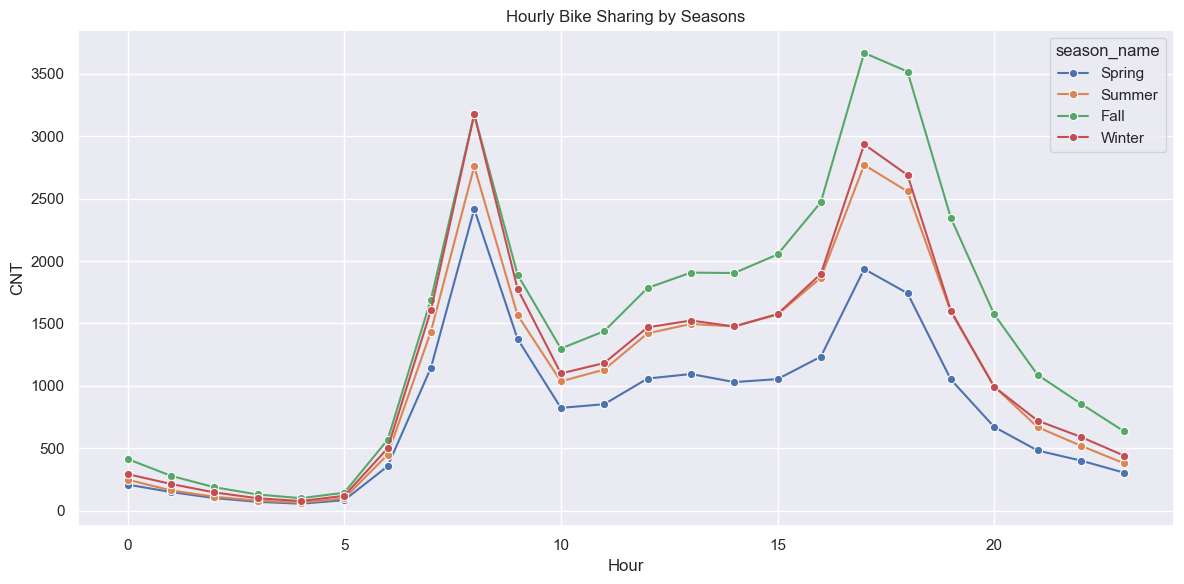

In [106]:

season_labels = {0: 'Spring', 1: 'Summer', 2: 'Fall', 3: 'Winter'}
df['season_name'] = df['season'].map(season_labels)

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='hour', hue='season_name', y='cnt', marker='o', ci=None)
plt.title('Hourly Bike Sharing by Seasons')
plt.xlabel('Hour')
plt.ylabel('CNT')
plt.grid(True)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by day of week.

- You may want to see whether it is a holiday or not


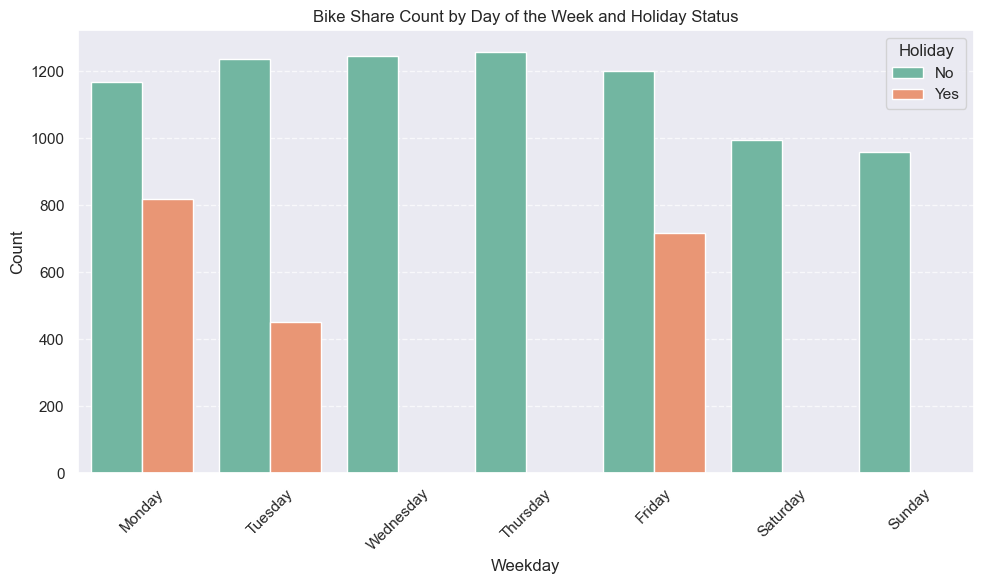

In [117]:
day_map = {
    'Monday': 'Monday',
    'Tuesday': 'Tuesday',
    'Wednesday': 'Wednesday',
    'Thursday': 'Thursday',
    'Friday': 'Friday',
    'Saturday': 'Saturday',
    'Sunday': 'Sunday'
}
df['day_name_tr'] = df['day_name'].map(day_map)

# Türkçe gün sıralaması
order_days_tr = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day_name_tr', y='cnt', hue='is_holiday', ci=None, order=order_days_tr, palette='Set2')

plt.title('Bike Share Count by Day of the Week and Holiday Status')
plt.xlabel('Weekday')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Holiday', labels=['No', 'Yes'])
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by day of month.




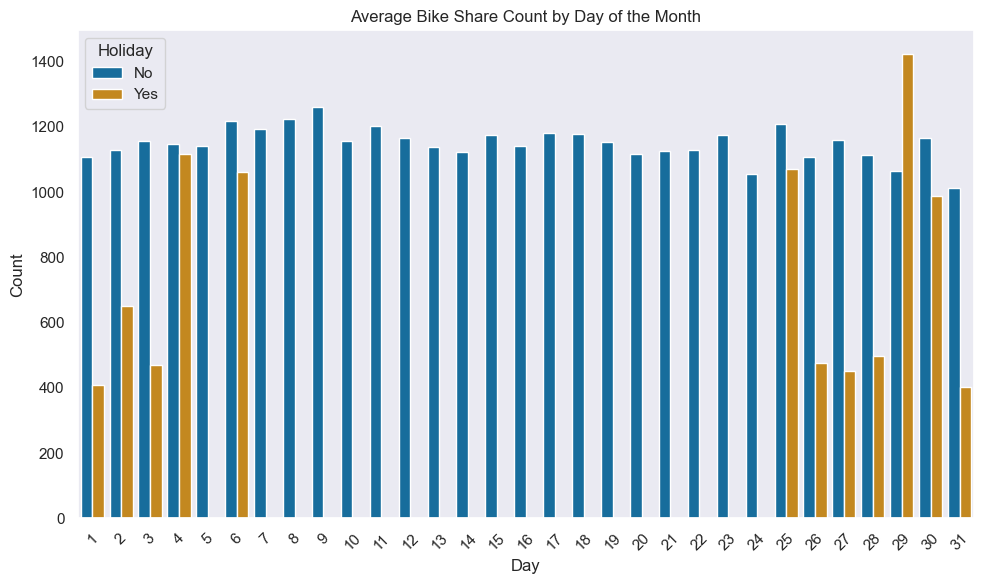

In [120]:


plt.figure(figsize=(10,6))
sns.barplot(data=df, x='day_of_month', y='cnt', estimator='mean', ci=None, palette='colorblind', hue='is_holiday')
plt.title('Average Bike Share Count by Day of the Month')
plt.xlabel('Day')
plt.legend(title='Holiday', labels=['No', 'Yes'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.ylabel('Count')
plt.show()

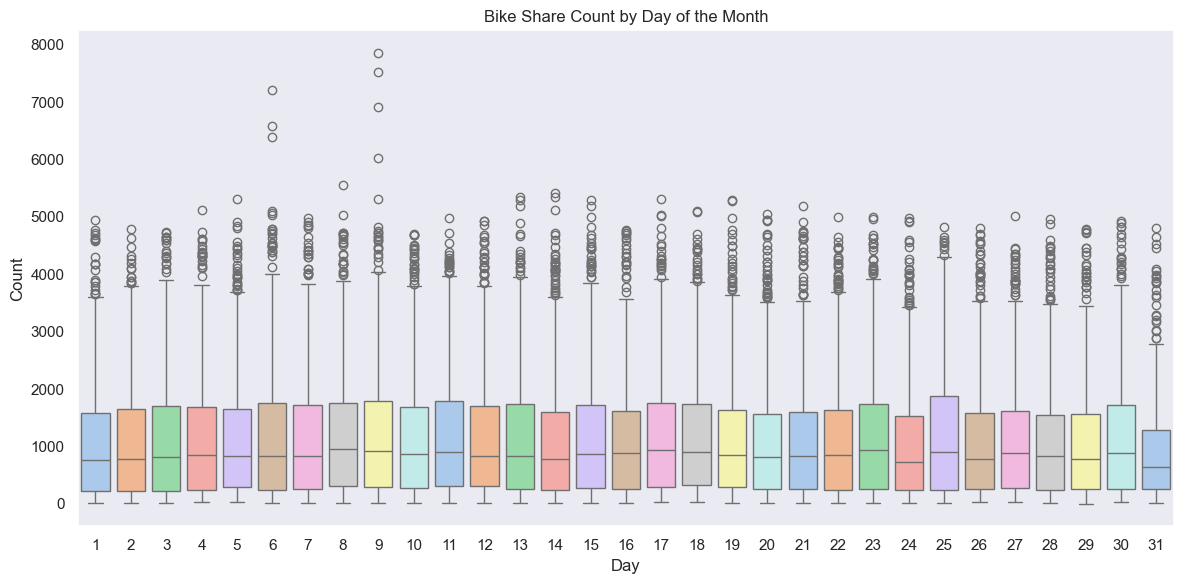

In [122]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='day_of_month', y='cnt', palette='pastel')
plt.title('Bike Share Count by Day of the Month')
plt.xlabel('Day')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot bike shares by year

- Plot bike shares on holidays by seasons



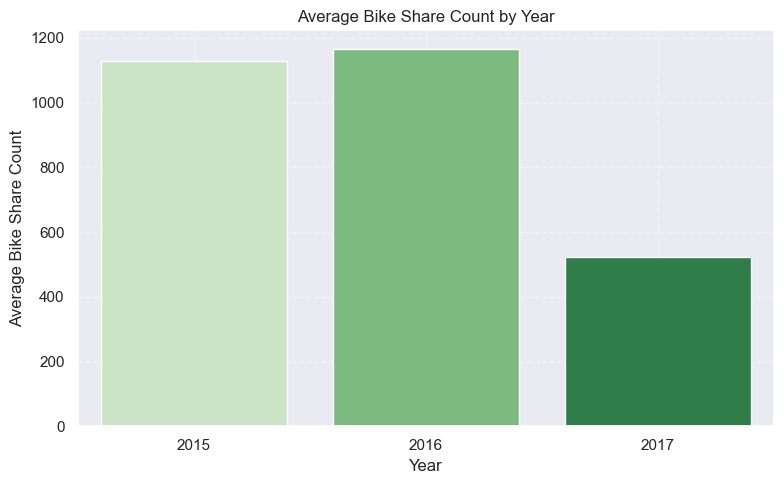

In [125]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='year', y='cnt', estimator='mean', ci=None, palette='Greens')
plt.title("Average Bike Share Count by Year")
plt.xlabel("Year")
plt.ylabel("Average Bike Share Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

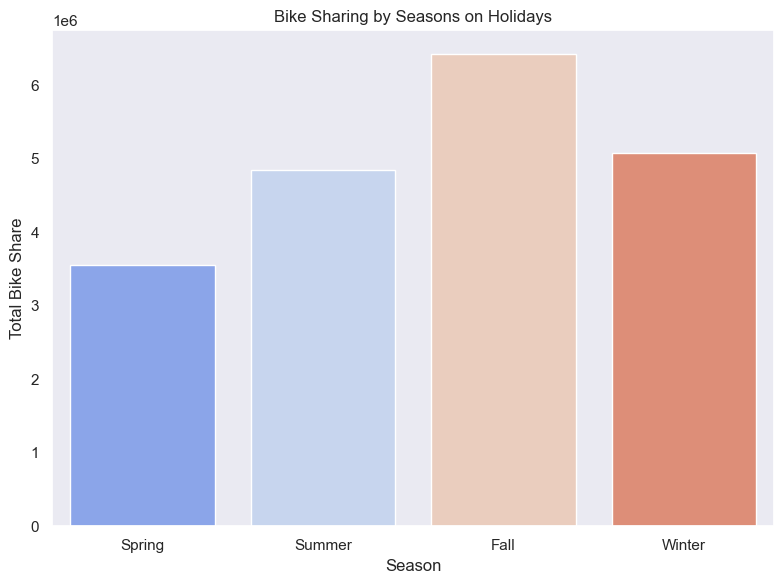

In [129]:
df['season_name_tr'] = df['season_name'].map({
    'Spring': 'Spring',
    'Summer': 'Summer',
    'Fall': 'Fall',
    'Winter': 'Winter'
})

season_order_tr = ['Spring', 'Summer', 'Fall', 'Winter']

plt.figure(figsize=(8,6))
sns.barplot(
    data=df,
    x='season_name_tr',
    y='cnt',
    estimator='sum',
    ci=None,
    palette='coolwarm',
    
)
plt.title('Bike Sharing by Seasons on Holidays')
plt.xlabel('Season')
plt.ylabel('Total Bike Share')
plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Visualize the distribution of bike shares by weekday/weekend with piechart and barplot




In [132]:
list(df.columns)

['cnt',
 't1',
 't2',
 'hum',
 'wind_speed',
 'weather_code',
 'is_holiday',
 'is_weekend',
 'season',
 'hour',
 'day_of_week',
 'day_name',
 'day_of_month',
 'month',
 'month_name',
 'year',
 'week_of_year',
 'year_month',
 'season_name',
 'day_name_tr',
 'season_name_tr']

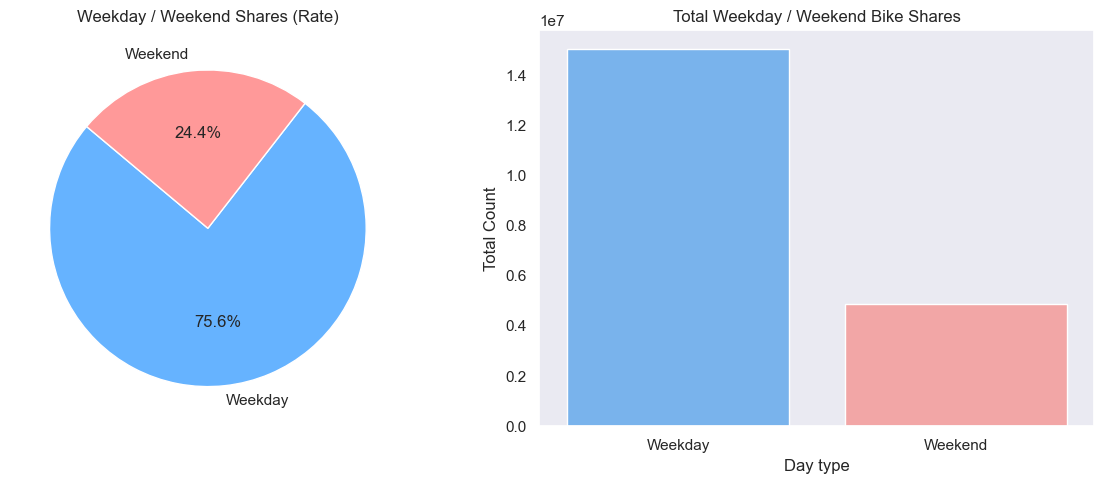

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns


counts = df.groupby('is_weekend')['cnt'].sum()
labels = ['Weekday', 'Weekend']
colors = ['#66b3ff', '#ff9999']


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].pie(counts, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
axes[0].set_title('Weekday / Weekend Shares (Rate)')


sns.barplot(x=labels, y=counts.values, palette=colors, ax=axes[1])
axes[1].set_title('Total Weekday / Weekend Bike Shares')
axes[1].set_xlabel('Day type')
axes[1].set_ylabel('Total Count')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Plot the distribution of weather code by seasons




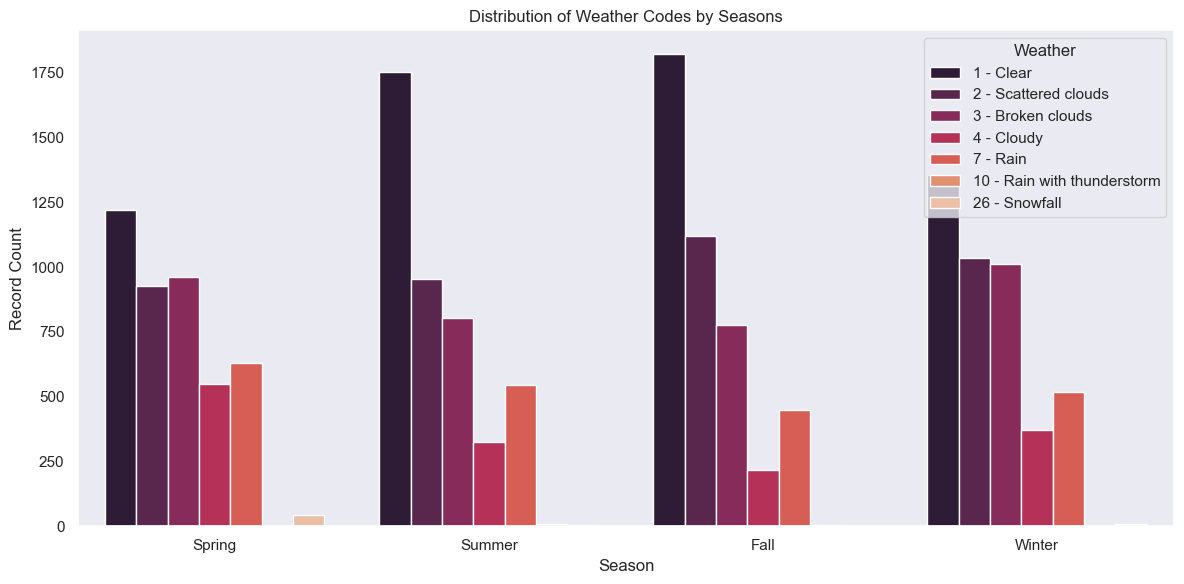

In [137]:
weather_labels = {
    1: '1 - Clear',
    2: '2 - Scattered clouds ',
    3: '3 - Broken clouds',
    4: '4 - Cloudy',
    7: '7 - Rain',
    10: '10 - Rain with thunderstorm',
    26: '26 - Snowfall',
    94: '94 - Freezing fog'
}

df['season_name_tr'] = df['season_name'].map({
    'Spring': 'Spring',
    'Summer': 'Summer',
    'Fall': 'Fall',
    'Winter': 'Winter'
})


plt.figure(figsize=(12,6))
ax = sns.countplot(data=df, x='season_name_tr', hue='weather_code', palette='rocket')
plt.title('Distribution of Weather Codes by Seasons')
plt.xlabel('Season')
plt.ylabel('Record Count')


handles, labels = ax.get_legend_handles_labels()
new_labels = []
for lbl in labels:
    try:
        code = int(float(lbl))
        new_labels.append(weather_labels.get(code, str(code)))
    except:
        new_labels.append(lbl)

ax.legend(handles, new_labels, title='Weather')

plt.tight_layout()
plt.show()


<div class="alert alert-block alert-success">

### <span style=" color:red"> Feel free to include any additional analyses.




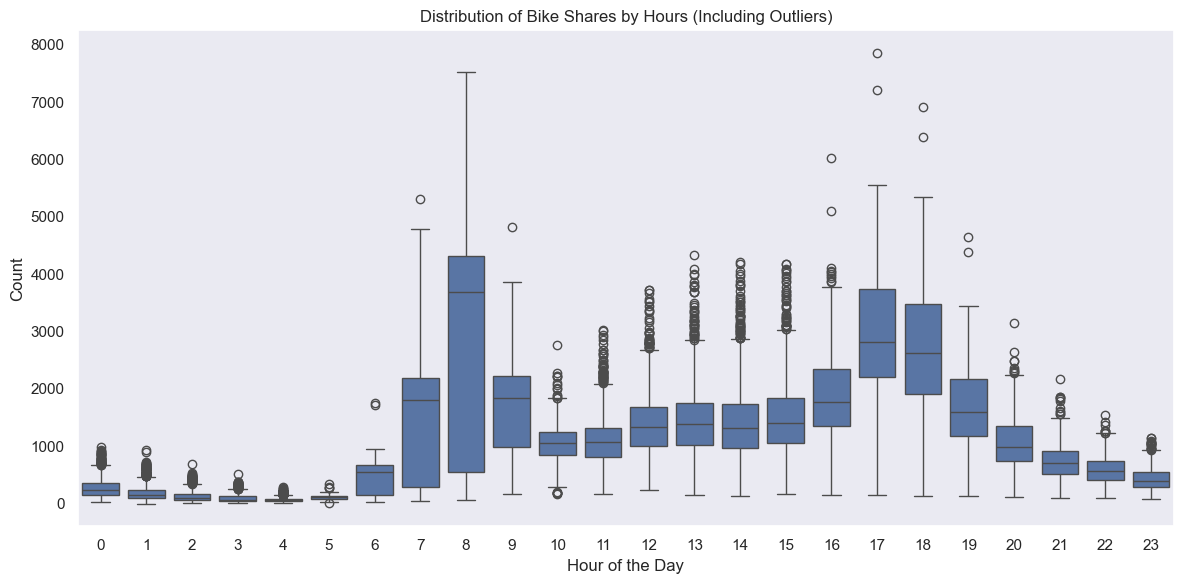

In [140]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='hour', y='cnt')
plt.title("Distribution of Bike Shares by Hours (Including Outliers)")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.xticks(range(24))  # Saatleri 0'dan 23'e göster
plt.tight_layout()
plt.show()

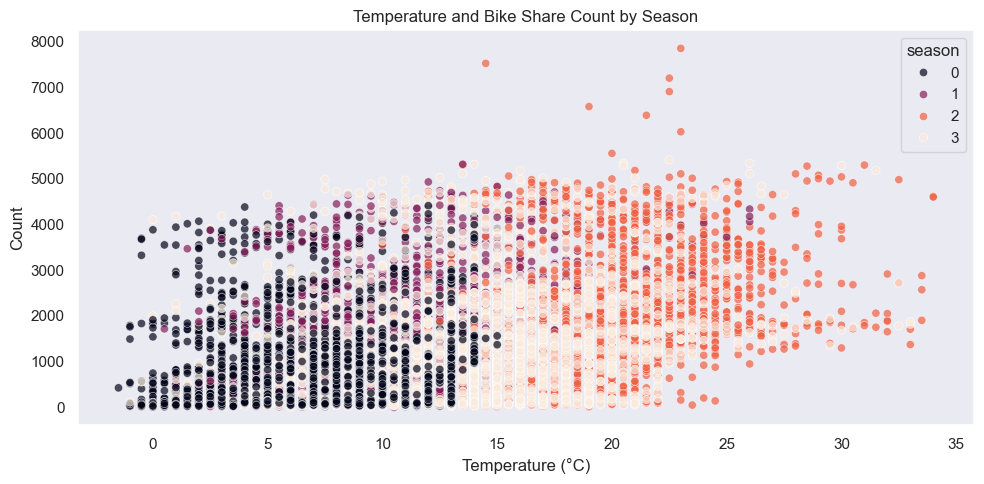

In [142]:

df['mevsimler'] = df['season_name'].map({
    'Spring': 'Spring',
    'Summer': 'Summer',
    'Fall': 'Fall',
    'Winter': 'Winter'
})

plt.figure(figsize=(10, 5))
sns.scatterplot(
    data=df, 
    x='t1', 
    y='cnt', 
    hue='season',   
    palette='rocket', 
    alpha=0.7
)
plt.title('Temperature and Bike Share Count by Season')
plt.xlabel('Temperature (°C)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


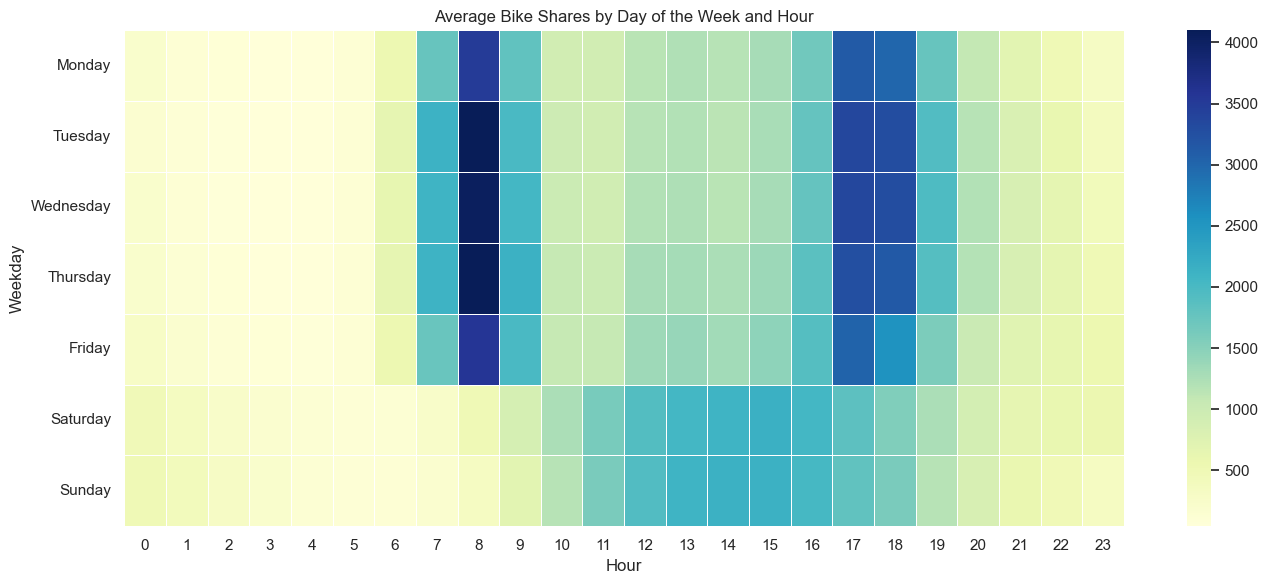

In [144]:
gunler = {
    'Monday': 'Monday',
    'Tuesday': 'Tuesday',
    'Wednesday': 'Wednesday',
    'Thursday': 'Thursday',
    'Friday': 'Friday',
    'Saturday': 'Saturday',
    'Sunday': 'Sunday'
}



pivot = df.pivot_table(values='cnt', index='day_name_tr', columns='hour', aggfunc='mean')
pivot = pivot.reindex(gunler).fillna(0)

plt.figure(figsize=(14,6))
sns.heatmap(pivot, cmap='YlGnBu', linewidths=0.5)
plt.title('Average Bike Shares by Day of the Week and Hour')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.tight_layout()
plt.show()


<div class="alert alert-info alert-warning ">

# <span style=" color:red">Conclusions


<div class="alert alert-block alert-success">   
    
### <span style=" color:red">
    
Conclusion:

London Bike Sharing Analysis
<br> This exploratory data analysis (EDA) on the London bike-sharing dataset reveals clear patterns in user behavior based on time, weather conditions, and seasonality.

Time-Based Findings:
Weekdays show the highest levels of bike usage.

Usage peaks during rush hours (07:00–09:00 and 17:00–19:00).
On weekends, usage is more evenly distributed throughout the day, typically peaking between 11:00 and 16:00.
Fall is consistently the season with the highest usage.
Impact of Weather Conditions:
Clear weather (Code 1) days have the highest bike usage.
Usage drops significantly on rainy, snowy, and foggy days.

There is a strong positive correlation between temperature (t1, t2) and bike usage.
Humidity and precipitation (weather_code) negatively impact demand.

Holidays and Weekends:
Usage on official holidays is even lower than on regular weekends.
This may be due to reduced commuting traffic and people choosing to stay at home.

Seasonal Trends:
Fall and Summer are the peak seasons for bike sharing.
Winter, especially snowy and extremely cold days, sees the lowest usage.

Correlation Summary:
There is a positive correlation between bike share count (cnt) and temperature, and a negative correlation with humidity.
No significant relationship was found with binary variables like wind speed, holiday, or weekend.

Recommendations & Actionable Insights:
Service providers can optimize bike availability based on seasonal changes and hourly demand patterns.
Urban planners can use this data to improve infrastructure—like bike lanes and parking spaces—during high-demand periods.


<div class="alert alert-info alert-warning ">
    
# <span style=" color:Green"> Project Contributors:

1-  Ahmet Derya<br>
2-  Barış Güngör<br>
3-  Betül Gürlevik<br>
4-  Kaan Altay<br>
5-  Mehmet Düzenli<br>
6-  Mehmet Enes Söyler<br>
7-  Meray Erzi<br>
8-  Şule Demir<br>
9-  Yavuz Selim Küçükönder<br>
10- Melahat Işılay TAMER<br>
11- Zaka Mikayilzade<br>
12- Neslihan Bozkurt<br>
13- Nazgul Barpieva<br>
14- Muhammed Bakirtas<br>
15- Mesut Karagöz<br>

Project Supervisor : Huriye Büyükpancar</span>


# <p style="background-color:green;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:20px 20px;"><b>Bike Demand Project</b></p>

![](https://www.techproeducation.com/logo/headerlogo.svg)

<b>Yeniliklerden ilk siz haberdar olmak istiyorsanız lütfen bizi takip etmeyi unutmayın </b>[YouTube](https://www.youtube.com/c/techproeducation) | [Instagram](https://www.instagram.com/techproeducation) | [Facebook](https://www.facebook.com/techproeducation) | [Telegram](https://t.me/joinchat/HH2qRvA-ulh4OWbb) | [Whatsapp](https://api.whatsapp.com/send/?phone=%2B15853042959&text&type=phone_number&app_absent=0) | [LinkedIn](https://www.linkedin.com/company/techproeducation/mycompany/) |
